In [ ]:
import numpy as np
import plotly.graph_objects as go

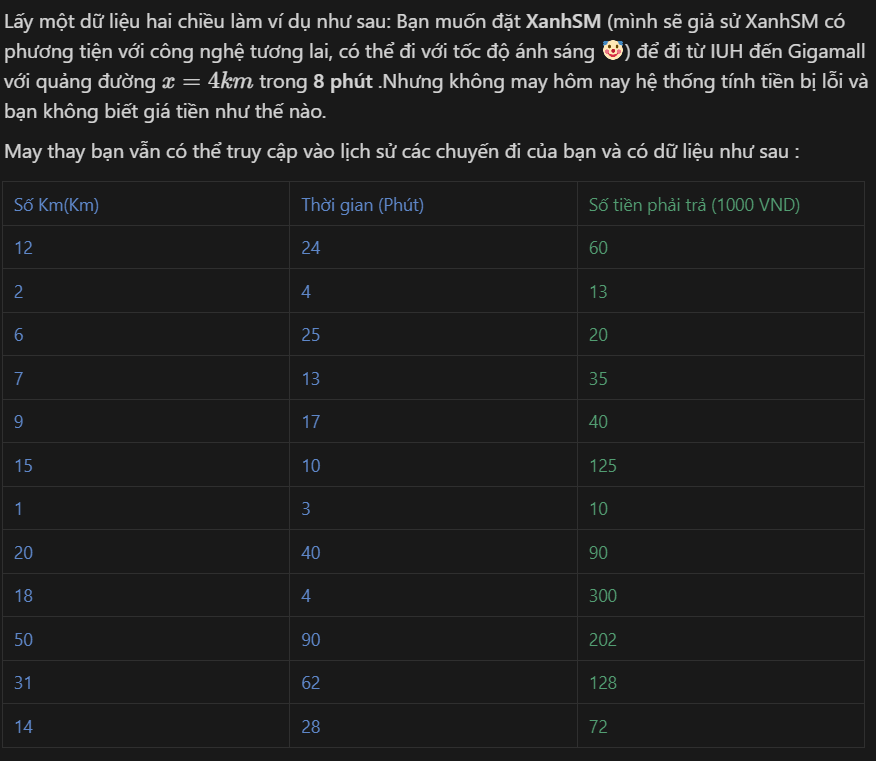

# Visualize data

In [ ]:
X = np.array([[12,2,6,7,9,15,1,20,18,50,31,14],
              [24,4,25,13,17,10, 3,40,4,90,62,28]]).T
y = np.array([60,13,20,36,40,126,10,90,300,202,128,72]).reshape(-1,1)

fig = go.Figure(data=[go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=y.ravel(),
    mode='markers',
    marker=dict(
        size=8,
        color=y.ravel(),               
        colorscale='Viridis',   
        opacity=0.8
    )
)])

fig.update_layout(
    scene = dict(
        xaxis_title='Số Km',
        yaxis_title='Thời gian',
        zaxis_title='Giá tiền'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)
fig.show()

# Nghiệm theo công thức

Siêu phẳng ta cần tìm sẽ có dạng $y = w_0 + w_1 x_1 + w_2 x_2 $

In [ ]:
from numpy import linalg as LA

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one,X), axis = 1)
# ap dụng cong thuc tìm nghiem:
result_least_square = LA.pinv(Xbar.T @ Xbar) @ Xbar.T @ y
print("Nghiệm tìm được từ công thức: ")
print("w0 = ", result_least_square[0])
print("w1 = ", result_least_square[1])
print("w2 = ", result_least_square[2])

In [ ]:
space_x = np.linspace(X[:,0].min(), X[:,0].max(), num=100)
space_y = np.linspace(X[:,1].min(), X[:,1].max(), num=100)
x_grid, y_grid = np.meshgrid(space_x, space_y)

z = result_least_square[0] + result_least_square[1]*x_grid + result_least_square[2]*y_grid # w0 + w1*x1 + w2*x2
scatter = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=y.ravel(),
    mode='markers',
    marker=dict(
        size=8,
        color=y.ravel(),               
        colorscale='Viridis',   
        opacity=0.8
    )
)
surface = go.Surface(x=x_grid, y=y_grid, z=z, colorscale='Viridis', showscale=False, opacity=0.6)
data = [scatter, surface]
layout = go.Layout(
    scene = dict(
        xaxis_title='Số Km',
        yaxis_title='Thời gian',
        zaxis_title='Giá tiền'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Nghiệm với Gradient Descent

In [ ]:
class LinearRegression: 
    def __init__(self, learning_rate=0.05, #learning rate
							      iterations=601, # epoch
							      tolerance=1e-3, # eps
							       clip_value=1.0): # clip to ignore gradient Explode:
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.tolerance = tolerance
        self.clip_value = clip_value
        self.weights, self.bias = self._initialize_parameters()

    def _initialize_parameters(self):
        '''
             Init Param from zeros
        '''
        weights = np.zeros((X.shape[1], 1))
        bias = 0
        return weights, bias

    def _compute_cost(self, y, y_hat):
        """
		    MSE from scratch
		"""
        m = len(y)
        cost = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
        return cost

    def _compute_gradients(self, X, y, y_hat):
        """
		    calculate gradient of MSE
		"""
        m = len(y)
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = (1 / m) * np.sum(y_hat - y)
        return dw, db

    def _clip_gradients(self, dw, db):
        """
		    use to avoid gradient exploxe
		"""
        dw = np.clip(dw, -self.clip_value, self.clip_value)
        db = np.clip(db, -self.clip_value, self.clip_value)
        return dw, db

    def _update_parameters(self, dw, db):
        """
			gradient update
		"""
        self.weights = self.weights - self.learning_rate * dw
        self.bias = self.bias - self.learning_rate * db

    def train(self, X, y):
        for i in range(self.iterations):
            y_hat = np.dot(X, self.weights) + self.bias
            cost = self._compute_cost(y, y_hat)
            dw, db = self._compute_gradients(X, y, y_hat)
            dw, db = self._clip_gradients(dw, db)
            if np.linalg.norm(dw)/len(dw) < self.tolerance:
                print(f"Convergence reached at iteration {i}")
                break
            self._update_parameters(dw, db)
            if i % 50==0:
                print(f"Iteration {i}, cost: {cost}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

model = LinearRegression()
model.train(X, y)

In [ ]:
print("Nghiệm tìm bởi Gradient Descent")
print("w0 = ", model.bias)
print("w1 = ", model.weights[0][0])
print("w2 = ", model.weights[1][0])

In [ ]:
space_x = np.linspace(X[:,0].min(), X[:,0].max(), num=100)
space_y = np.linspace(X[:,1].min(), X[:,1].max(), num=100)
x_grid, y_grid = np.meshgrid(space_x, space_y)

z = model.bias + model.weights[0]*x_grid + model.weights[1]*y_grid # w0 + w1*x1 + w2*x2
scatter = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=y.ravel(),
    mode='markers',
    marker=dict(
        size=8,
        color=y.ravel(),               
        colorscale='Viridis',   
        opacity=0.8
    )
)
surface = go.Surface(x=x_grid, y=y_grid, z=z, colorscale='Viridis', showscale=False, opacity=0.6)
data = [scatter, surface]
layout = go.Layout(
    scene = dict(
        xaxis_title='Số Km',
        yaxis_title='Thời gian',
        zaxis_title='Giá tiền'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Nghiệm bởi Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model_sk = LinearRegression()
model_sk.fit(X, y)

predictions = model_sk.predict(X)
#
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

print(f"w0 = {model_sk.intercept_[0]}")
print(f"w1 = {model_sk.coef_[0][0]}")
print(f"w2 = {model_sk.coef_[0][1]}")